In [ ]:
import kaggle

OSError: ignored

In [ ]:
!mv kaggle.json /root/.kaggle/ # moving kaggle.json file into kaggle directory

In [ ]:
import kaggle

In [ ]:
! kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:38<00:00, 23.0MB/s]
100% 812M/812M [00:38<00:00, 22.3MB/s]


In [ ]:
! unzip -q dogs-vs-cats.zip

In [ ]:
! unzip -q train.zip

In [ ]:
import os

In [ ]:
len(os.listdir('train/')) # 25000 files inside train folder

25000

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf

# Data flow from dataframe

In [ ]:
data=pd.DataFrame(columns=['filename','label'])
data['filename']=os.listdir('train/')
data['label']=None
data.head()

,filename,label
0,cat.3022.jpg,None
1,cat.6307.jpg,None
2,dog.983.jpg,None
3,cat.12074.jpg,None
4,dog.3778.jpg,None


In [ ]:
data['label']=data['filename'].str.split(pat='.',n=1,expand=True)[0].values

In [ ]:
data.head()

,filename,label
0,cat.3022.jpg,cat
1,cat.6307.jpg,cat
2,dog.983.jpg,dog
3,cat.12074.jpg,cat
4,dog.3778.jpg,dog


In [ ]:
idg=tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.1,rescale=1/255.0)

In [ ]:
batch_size=64

In [ ]:
train_idg=idg.flow_from_dataframe(dataframe=data,
                        directory='train/',
                        x_col='filename',
                        y_col='label',
                        target_size=(150,150),
                        color_mode='rgb',
                        batch_size=batch_size,
                        subset='training')

Found 22500 validated image filenames belonging to 2 classes.


In [ ]:
validation_idg=idg.flow_from_dataframe(dataframe=data,
                                       directory='train/',
                                       x_col='filename',
                                       y_col='label',
                                       target_size=(150,150),
                                       color_mode='rgb',
                                       batch_size=batch_size,
                                       subset='validation')

Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
type(train_idg)

keras.preprocessing.image.DataFrameIterator

In [ ]:
type(validation_idg)

keras.preprocessing.image.DataFrameIterator

In [ ]:
# CNN model creation

# Type of model
model=tf.keras.models.Sequential()

# Input layer of model
model.add(tf.keras.layers.Input(shape=(150,150,3),name='InputLayer'))

# Chunk 1
# Convolution + Relu
model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 name='Conv1'))
# Max Pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=2,
                                       padding='same',
                                       name='Pool1'))

# Chunk 2
# Convolution + Relu
model.add(tf.keras.layers.Conv2D(filters=64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 name='Conv2'))

# Max Pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=2,
                                       padding='same',
                                       name='Pool2'))

# Chunk 3
# Convolution + Relu
model.add(tf.keras.layers.Conv2D(filters=128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 name='Conv3'))
# Max Pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=2,
                                       padding='same',
                                       name='Pool3'))

# Chunk 4
# Convolution + Relu
model.add(tf.keras.layers.Conv2D(filters=256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 name='Conv4'))
# Max Pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=2,
                                       padding='same',
                                       name='Pool4'))
# Flattening Layer
model.add(tf.keras.layers.Flatten(name='FlattenLayer'))
# Hidden Layer 1
model.add(tf.keras.layers.Dense(units=32,
                                activation='relu',
                                name='HiddenLayer1'))
# Output Layer
model.add(tf.keras.layers.Dense(units=2,
                                activation='softmax',
                                name='OutputLayer'))
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 150, 150, 32)      896       
                                                                 
 Pool1 (MaxPooling2D)        (None, 75, 75, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 75, 75, 64)        18496     
                                                                 
 Pool2 (MaxPooling2D)        (None, 38, 38, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 38, 38, 128)       73856     
                                                                 
 Pool3 (MaxPooling2D)        (None, 19, 19, 128)       0         
                                                                 
 Conv4 (Conv2D)              (None, 19, 19, 256)      

In [ ]:
# CNN model creation -2

# Type of model
model2=tf.keras.models.Sequential()

# Input layer of model
model2.add(tf.keras.layers.Input(shape=(150,150,3),name='InputLayer'))

# Chunk 1
# Convolution + Relu
model2.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 name='Conv1'))

# Convolution + Relu
model2.add(tf.keras.layers.Conv2D(filters=64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 name='Conv2'))

# Max Pooling
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=2,
                                       padding='same',
                                       name='Pool2'))

# Chunk 2
# Convolution + Relu
model2.add(tf.keras.layers.Conv2D(filters=128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 name='Conv3'))

# Convolution + Relu
model2.add(tf.keras.layers.Conv2D(filters=256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 name='Conv4'))
# Max Pooling
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=2,
                                       padding='same',
                                       name='Pool4'))
# Flattening Layer
model2.add(tf.keras.layers.Flatten(name='FlattenLayer'))
# Hidden Layer 1
model2.add(tf.keras.layers.Dense(units=32,
                                activation='relu',
                                name='HiddenLayer1'))
# Output Layer
model2.add(tf.keras.layers.Dense(units=2,
                                activation='softmax',
                                name='OutputLayer'))
# model summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 150, 150, 32)      896       
                                                                 
 Conv2 (Conv2D)              (None, 150, 150, 64)      18496     
                                                                 
 Pool2 (MaxPooling2D)        (None, 75, 75, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 75, 75, 128)       73856     
                                                                 
 Conv4 (Conv2D)              (None, 75, 75, 256)       295168    
                                                                 
 Pool4 (MaxPooling2D)        (None, 38, 38, 256)       0         
                                                                 
 FlattenLayer (Flatten)      (None, 369664)           

In [ ]:
# Model Compilation
model2.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics='acc')

In [ ]:
# Plugging training data in model
model2.fit(train_idg,batch_size=batch_size,epochs=15,validation_data=validation_idg)

Epoch 1/15
352/352 [==============================] - 128s 341ms/step - loss: 0.6761 - acc: 0.5676 - val_loss: 0.6450 - val_acc: 0.6412
Epoch 2/15
352/352 [==============================] - 101s 287ms/step - loss: 0.6433 - acc: 0.6220 - val_loss: 0.6190 - val_acc: 0.6576
Epoch 3/15
352/352 [==============================] - 102s 288ms/step - loss: 0.6040 - acc: 0.6656 - val_loss: 0.5708 - val_acc: 0.7000
Epoch 4/15
352/352 [==============================] - 101s 286ms/step - loss: 0.5738 - acc: 0.6938 - val_loss: 0.5493 - val_acc: 0.7112
Epoch 5/15
352/352 [==============================] - 112s 317ms/step - loss: 0.5466 - acc: 0.7171 - val_loss: 0.5251 - val_acc: 0.7328
Epoch 6/15
352/352 [==============================] - 99s 281ms/step - loss: 0.5198 - acc: 0.7420 - val_loss: 0.5344 - val_acc: 0.7292
Epoch 7/15
352/352 [==============================] - 99s 281ms/step - loss: 0.4966 - acc: 0.7572 - val_loss: 0.5048 - val_acc: 0.7484
Epoch 8/15
352/352 [==============================

In [ ]:
train_acc=[]
val_acc=[]
train_loss=[]
val_loss=[]

In [ ]:
train_acc.append(model2.history.history['acc'])
val_acc.append(model2.history.history['val_acc'])
train_loss.append(model2.history.history['loss'])
val_loss.append(model2.history.history['val_loss'])

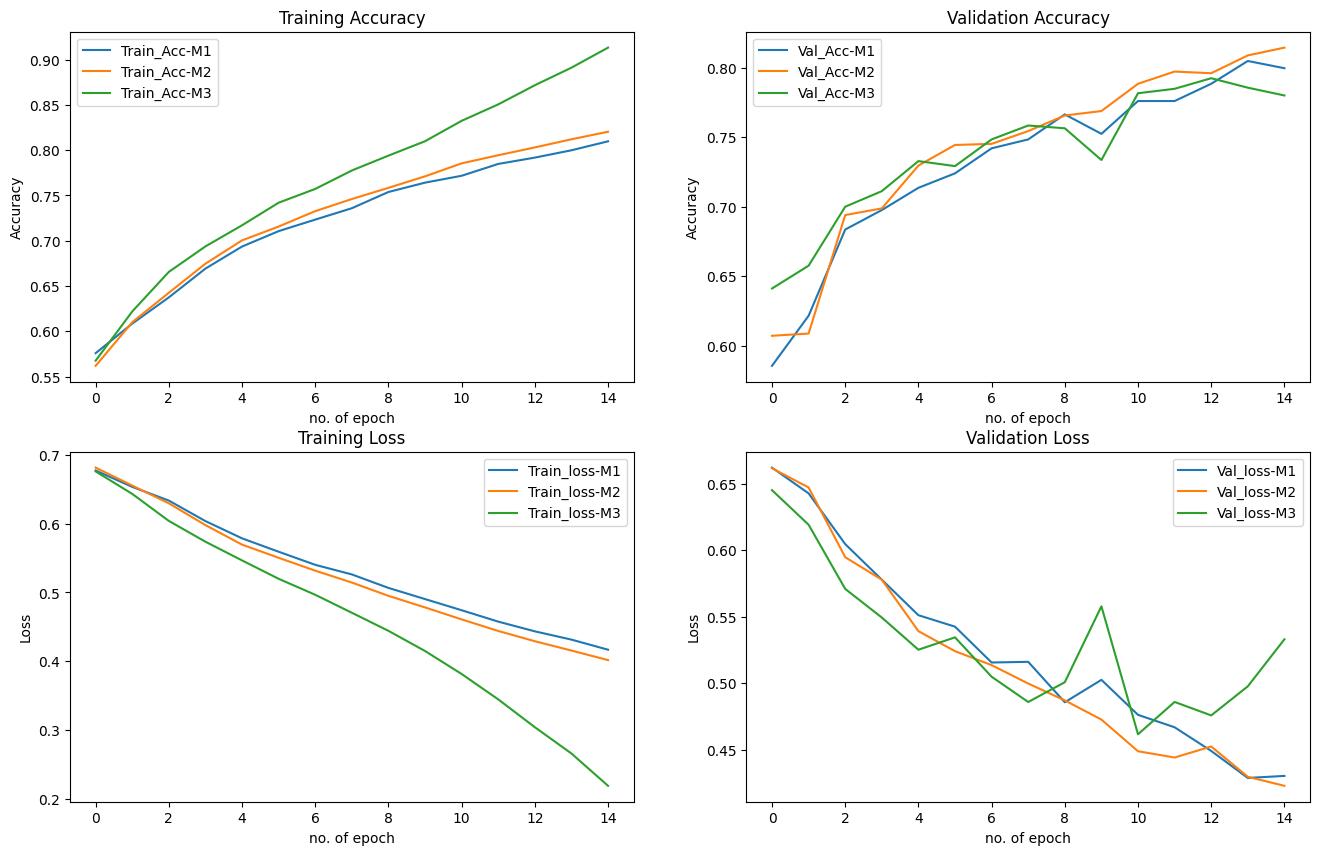

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.lineplot(train_acc[0],label='Train_Acc-M1')
sns.lineplot(train_acc[1],label='Train_Acc-M2')
sns.lineplot(train_acc[2],label='Train_Acc-M3')
plt.xlabel('no. of epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')

plt.subplot(2,2,2)
sns.lineplot(val_acc[0],label='Val_Acc-M1')
sns.lineplot(val_acc[1],label='Val_Acc-M2')
sns.lineplot(val_acc[2],label='Val_Acc-M3')
plt.xlabel('no. of epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')

plt.subplot(2,2,3)
sns.lineplot(train_loss[0],label='Train_loss-M1')
sns.lineplot(train_loss[1],label='Train_loss-M2')
sns.lineplot(train_loss[2],label='Train_loss-M3')
plt.xlabel('no. of epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.subplot(2,2,4)
sns.lineplot(val_loss[0],label='Val_loss-M1')
sns.lineplot(val_loss[1],label='Val_loss-M2')
sns.lineplot(val_loss[2],label='Val_loss-M3')
plt.xlabel('no. of epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Validation Loss')

plt.show()